<a href="https://colab.research.google.com/github/timlvd/PUC/blob/main/examen_reevalucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2703793647.py:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(img) # visualize image using imshow function
/tmp/ipython-input-2703793647.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


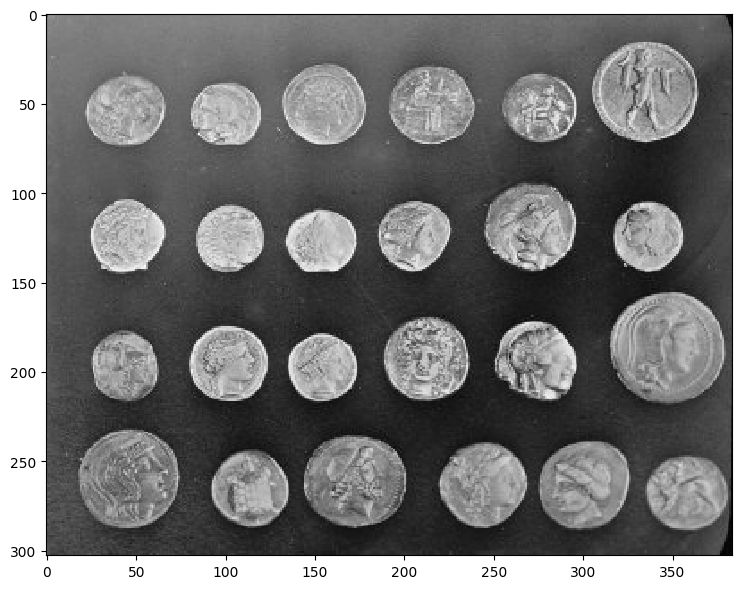

In [36]:
import matplotlib.pyplot as plt
from skimage import data

# Load the 'coins' image (grayscale)
img = data.coins()


fig = plt.figure(figsize=(10,6))
sk.io.imshow(img) # visualize image using imshow function
sk.io.show()


In [37]:
print('image size: ',img.shape)
print("pixel grayscale levels:", coins.min(), "to", coins.max())

image size:  (303, 384)
pixel grayscale levels: 1 to 252


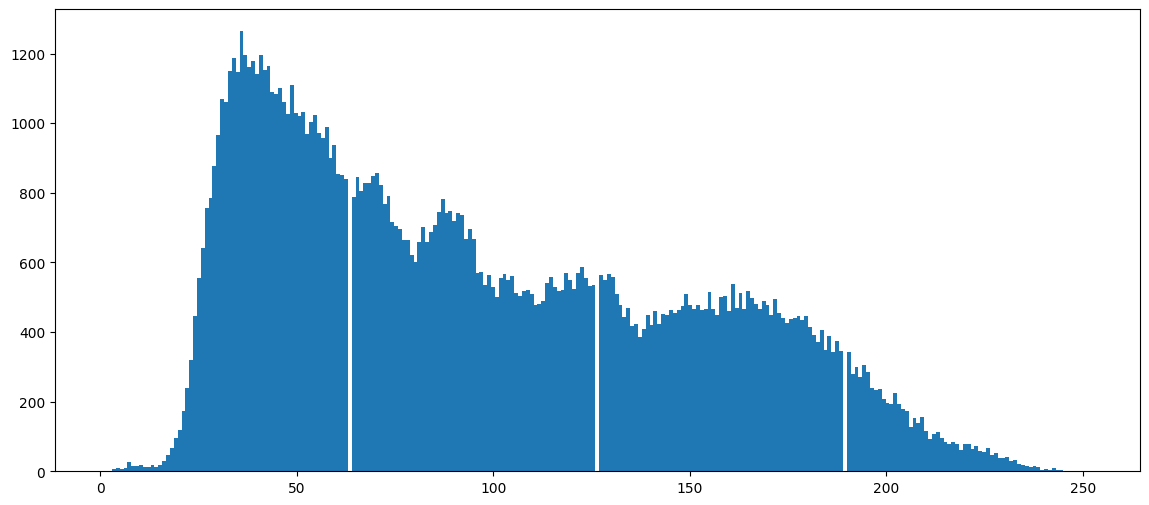

In [38]:
v = img.reshape(img.shape[0]*img.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

In [39]:
print('low peak between 5 and 60 correpspond to the backgrounds pixels that are dark')
print('peak between 60 and 130 refers to the coins pixels')
print('the third and fourth peak corresponds to highest pixels values so brightest regions of the image')

low peak between 5 and 60 correpspond to the backgrounds pixels that are dark
peak between 60 and 130 refers to the coins pixels
the third and fourth peak corresponds to highest pixels values so brightest regions of the image


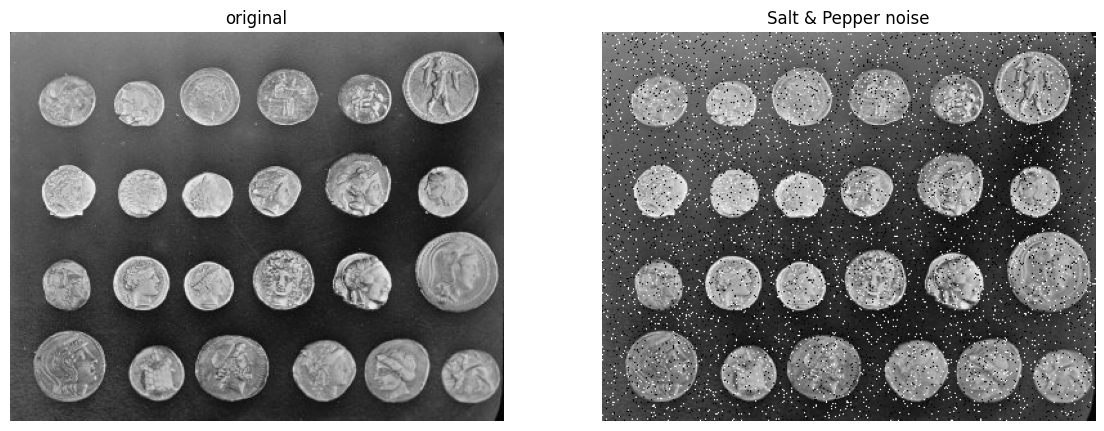

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte


## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(I)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

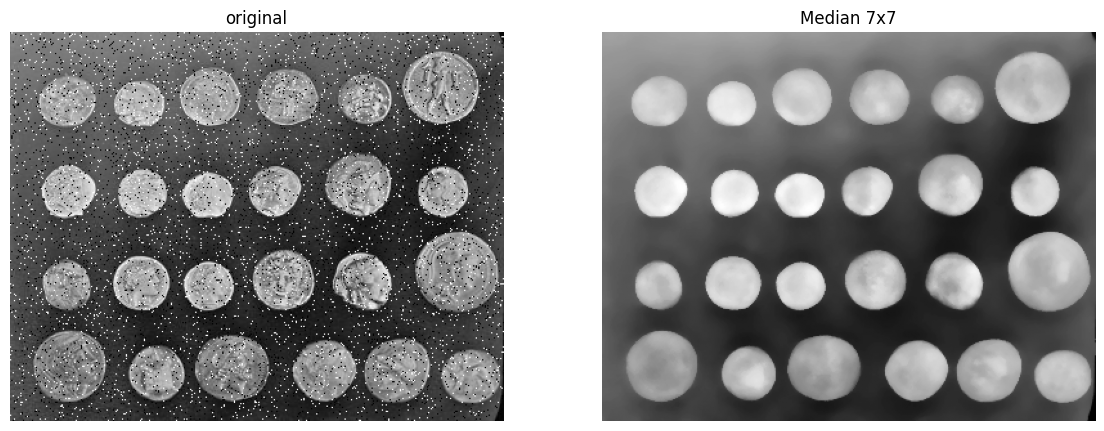

In [65]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel7 = disk(7) # structuring element disk radius 5 pixels
img_med7x7 = median(img, sel7)
plot_comparison(img,img_med7x7,'Median 7x7')
plt.savefig('median.png')

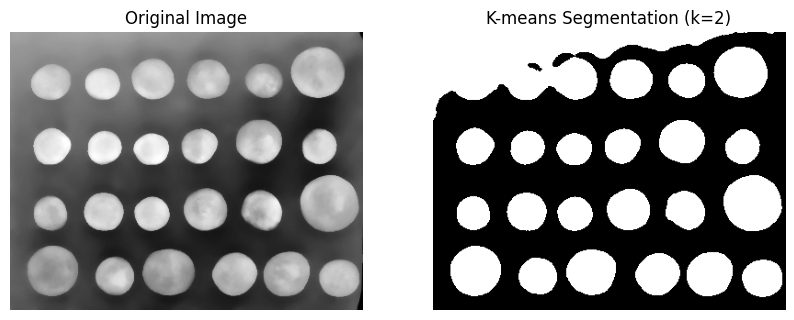

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import data

image = img_med7x7
# Reshape image
pixels = image.reshape(-1, 1)

# K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(pixels)

# Replace each pixel by its cluster center
segmented = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented.reshape(image.shape)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title("K-means Segmentation (k=2)")
ax[1].axis("off")

plt.show()

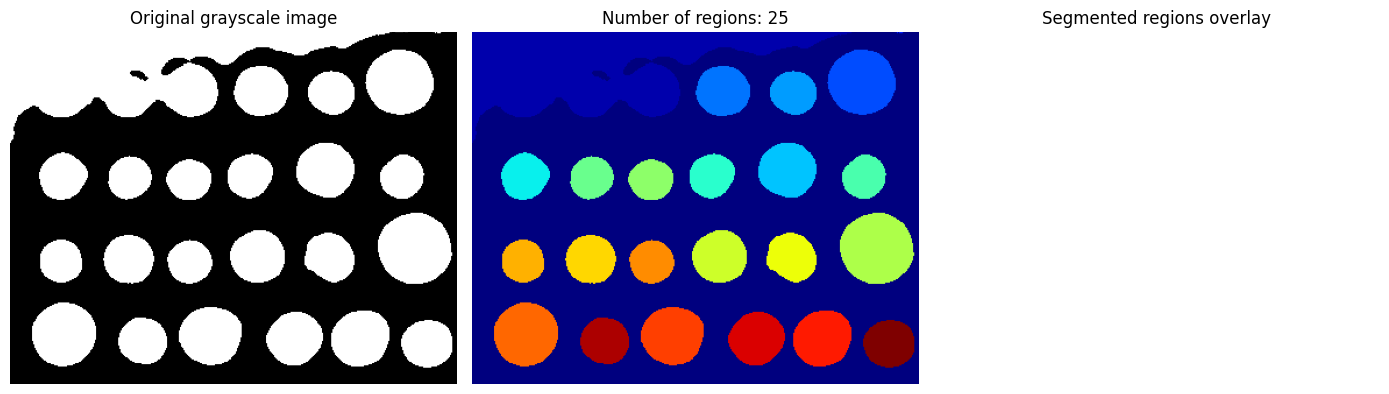

In [86]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

I = segmented_img # read image using imread function

# Verificar si la imagen tiene más de 2 dimensiones (RGB) y convertir a escala de grises si es necesario
if I.ndim == 3:
    IG = color.rgb2gray(I)  # Convertir solo si la imagen es RGB
else:
    IG = I  # Si ya es en escala de grises, no convertir

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [64]:
print('There are 24 coins in the image because the image is labelled into 25 regions including the background')

There are 24 coins in the image because the image is labelled into 25 regions including the background


In [83]:
from skimage.measure import regionprops
import numpy as np

props = regionprops(label_image)

for ireg in range(0,nregions):
    print('Area of region {} is = {} pixels'.format(ireg+1, props[ireg].area))
    print('Major Axis Length of Region {}: {} pixels'.format(ireg+1, props[ireg].major_axis_length))
    print('Orientation of Region {}: {} degrees'.format(ireg+1, props[ireg].orientation))

Area of region 1 is = 14116.0 pixels
Major Axis Length of Region 1: 298.9884428247503 pixels
Orientation of Region 1: -1.461370294141695 degrees
Area of region 2 is = 7.0 pixels
Major Axis Length of Region 2: 8.0 pixels
Orientation of Region 2: 1.5707963267948966 degrees
Area of region 3 is = 3.0 pixels
Major Axis Length of Region 3: 3.265986323710904 pixels
Orientation of Region 3: 1.5707963267948966 degrees
Area of region 4 is = 12.0 pixels
Major Axis Length of Region 4: 8.353086570459771 pixels
Orientation of Region 4: 1.530547354962331 degrees
Area of region 5 is = 2562.0 pixels
Major Axis Length of Region 5: 58.29028631316892 pixels
Orientation of Region 5: 1.469486396112643 degrees
Area of region 6 is = 1593.0 pixels
Major Axis Length of Region 6: 46.7836164993786 pixels
Orientation of Region 6: 1.509772571109068 degrees
Area of region 7 is = 1180.0 pixels
Major Axis Length of Region 7: 40.44699056847771 pixels
Orientation of Region 7: 1.366877888758194 degrees
Area of region 8 i

Average Area: 1905.0
Average Major Axis Length: 51.36230436479711
Average Orientation (radians): 0.019173950063881246


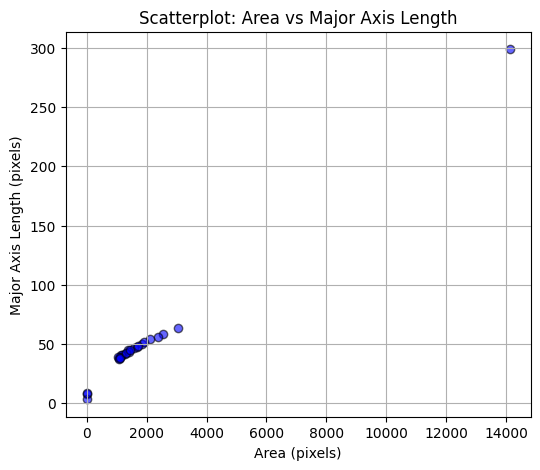

In [89]:
from skimage import measure

label_img = measure.label(bw)

regions = measure.regionprops(label_img)

areas = []
major_axes = []
orientations = []

for r in regions:
    areas.append(r.area)
    major_axes.append(r.major_axis_length)
    orientations.append(r.orientation)

print("Average Area:", np.mean(areas))
print("Average Major Axis Length:", np.mean(major_axes))
print("Average Orientation (radians):", np.mean(orientations))

plt.figure(figsize=(6,5))
plt.scatter(areas, major_axes, c='blue', alpha=0.6, edgecolors='k')
plt.xlabel("Area (pixels)")
plt.ylabel("Major Axis Length (pixels)")
plt.title("Scatterplot: Area vs Major Axis Length")
plt.grid(True)
plt.show()

In [93]:
import numpy as np

ind_large = np.where(area > 1750)
ind_lregions = np.array(ind_large)+1 #Note: region 1 is placed in component 0 or the props variable
area_large = area[ind_large]
print('There are {} areas bigger than 1750 pixels'.format(len(area_large)))

There are 7 areas bigger than 1750 pixels


In [95]:
ind_small = np.where(area < 1750)
area_small = area[ind_small]
ind_sregions = np.array(ind_small)+1

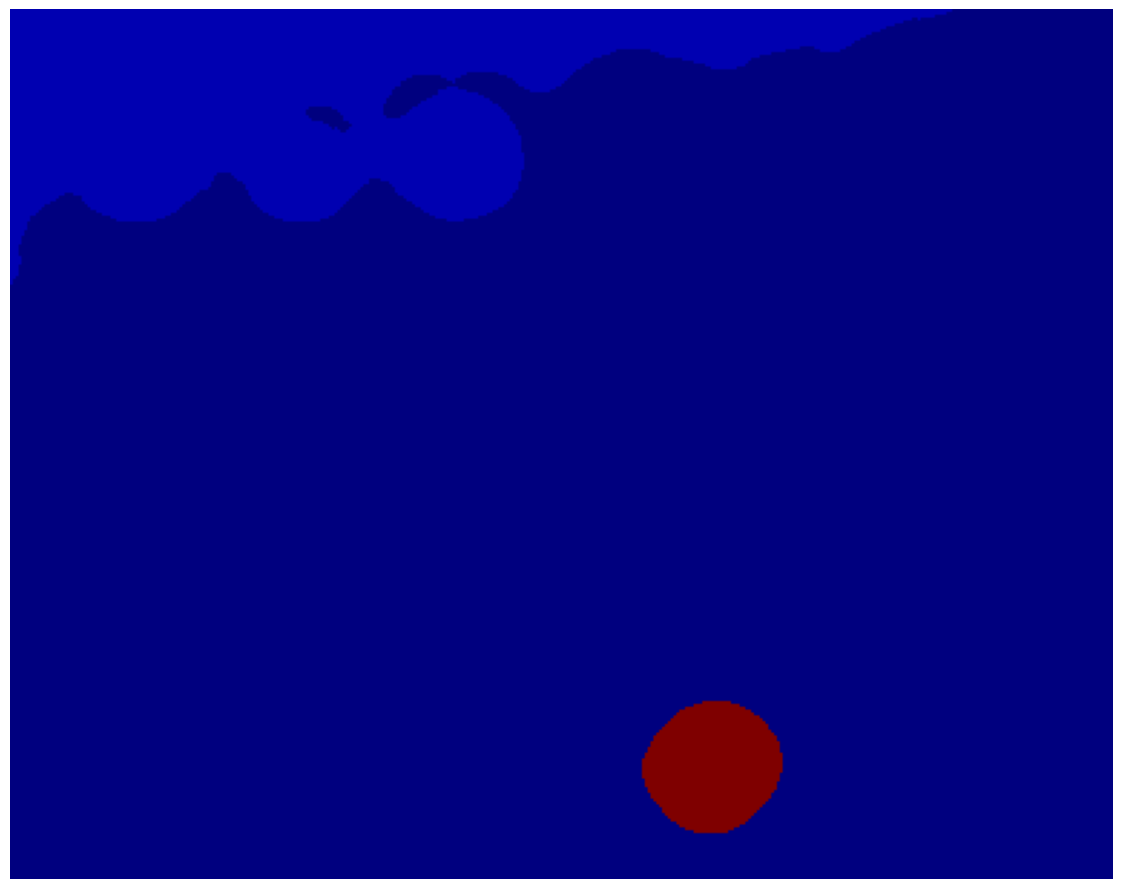

In [96]:
for i in np.squeeze(ind_small): # loop over small (spourious) regions
    iregion = i+1
    label_image[label_image==iregion]=0 # set spourious region as background by re-labelling as zero

image_label_overlay = label2rgb(label_image, image=IG) # generate again the colormap assignment

fig, ax = plt.subplots(figsize=(14, 9))
ax.imshow(label_image,cmap=plt.cm.jet)
ax.set_axis_off()
plt.tight_layout()
plt.show()